# Time Series Prepare Exercises

In [1]:
# tabular data manipulation
import numpy as np
import pandas as pd

# datetime utilities
####

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# our acquire script
import acquire as a
import prepare as p

The end result of this exercise should be a file named `prepare.py`

## Store Items Data

Using your store items data:

In [2]:
df = a.combined_df()

In [3]:
df = df.drop(columns=['item', 'store'])

In [4]:
df.head(1)

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


### 1.

Convert date column to datetime format.

In [5]:
df.sale_date.apply(lambda x: x[:-13])

0         Tue, 01 Jan 2013
1         Wed, 02 Jan 2013
2         Thu, 03 Jan 2013
3         Fri, 04 Jan 2013
4         Sat, 05 Jan 2013
                ...       
912995    Wed, 27 Dec 2017
912996    Thu, 28 Dec 2017
912997    Fri, 29 Dec 2017
912998    Sat, 30 Dec 2017
912999    Sun, 31 Dec 2017
Name: sale_date, Length: 913000, dtype: object

In [6]:
df.sale_date = pd.to_datetime(df.sale_date.apply(lambda x: x[:-13]))

In [7]:
df.head(1)

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,2013-01-01,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


### 2.

Plot the distribution of sale_amount and item_price.

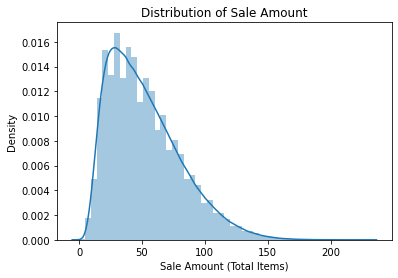

In [8]:
sns.distplot(df.sale_amount)
plt.title('Distribution of Sale Amount')
plt.xlabel('Sale Amount (Total Items)');

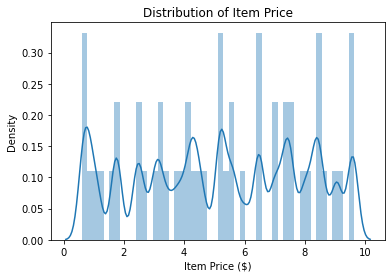

In [9]:
sns.distplot(df.item_price)
plt.title('Distribution of Item Price')
plt.xlabel('Item Price ($)');

### 3.

Set the index to be the datetime variable.

In [10]:
df = df.set_index('sale_date')

In [11]:
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


### 4.

Add a 'month' and 'day of week' column to your dataframe.

In [12]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [13]:
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday


### 5.

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [14]:
df['sales_total'] = df.sale_amount * df.item_price

In [15]:
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92


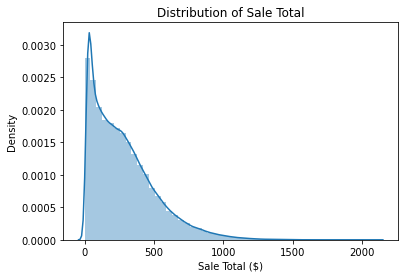

In [16]:
sns.distplot(df.sales_total)
plt.title('Distribution of Sale Total')
plt.xlabel('Sale Total ($)');

### 6.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [17]:
def clean_sales_data():
    '''
    Requires no inputs and returns cleaned sales data df
    '''
    df = a.combined_df() # call acquire function to get all data from API
    df = df.drop(columns=['item', 'store']) # drop redundant columns
    df.sale_date = pd.to_datetime(df.sale_date.apply(lambda x: x[:-13])) # convert data column into datetime dtype removing unneeded data
    df = df.set_index('sale_date') # set data column as index
    df['month'] = df.index.month_name() # add month name column
    df['day_of_week'] = df.index.day_name() # add day name column
    df['sales_total'] = df.sale_amount * df.item_price # add total sale amount column
    return df

In [18]:
# # run it calling function from notebook
# df = clean_sales_data()
# df.head(1)

In [19]:
# # run it using imported module
# df = p.clean_sales_data()
# df.head()

In [20]:
# write a function to cache it since it takes a minute to run
df = p.get_clean_sales_data()
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92


## OPS Data

Using the OPS data acquired in the Acquire exercises `opsd_germany_daily.csv`, complete the following:

In [21]:
df = a.get_power()

In [22]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [23]:
type(df.Date[0])

str

In [24]:
df.shape

(4383, 5)

### 1.

Convert date column to datetime format.

In [25]:
df.Date = pd.to_datetime(df.Date)

### 2.

Plot the distribution of each of your variables.

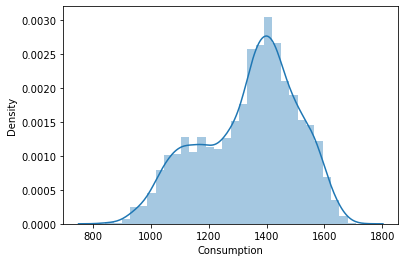

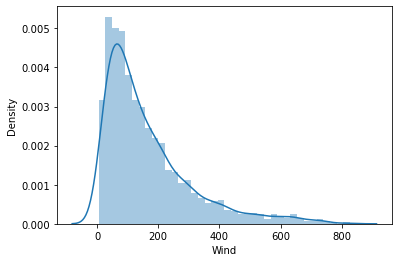

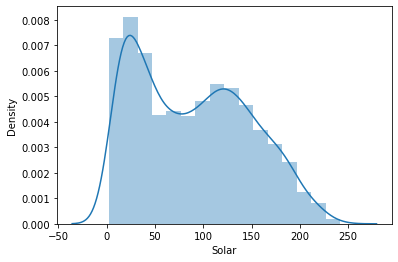

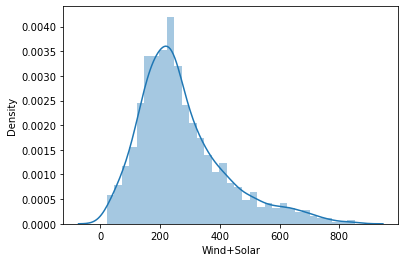

In [26]:
for col in df.drop(columns='Date').columns:
    sns.distplot(df[col])
    plt.show()

### 3.

Set the index to be the datetime variable.

In [27]:
df = df.set_index('Date')

### 4.

Add a month and a year column to your dataframe.

In [28]:
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


### 5.

Fill any missing values.
- Wind data didn't start being recorded until 2010
- Solar data didn't start being recorded until 2012
- All usage types are highly seasonal

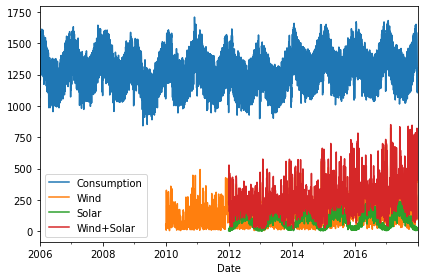

In [29]:
df.drop(columns=['year', 'month']).plot()
plt.tight_layout();

#### Wind Imputation

In [30]:
# let's see if there are any values for wind before 2010
df.Wind[df.year < 2010].sum()

0.0

In [31]:
# let's impute all those values as Os
df.Wind = np.where(df.year < 2010, 0, df.Wind)
# looks like we still have 2 left

In [32]:
# lets took a look at rows in wind column where a null remains
df[np.isnan(df.Wind)]

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2011-12-14,1531.311,NaN,NaN,NaN,12,2011
2014-03-12,1516.331,NaN,148.507,NaN,3,2014


In [33]:
# lets add column for wind for the previous time point (day)
df['wind_previous_day'] = df.Wind.shift(1)

In [34]:
# now lets make those that are null equal to the value from the previous day for the two remaining nulls
df.Wind[np.isnan(df.Wind)] = df.wind_previous_day

#### Solar Imputation

In [35]:
# let's see if there are any values for solar before 2012
df.Solar[df.year < 2012].sum()

0.0

In [36]:
# let's impute all those values as Os
df.Solar = np.where(df.year < 2012, 0, df.Solar)
# looks like we still have 4 left

In [37]:
# lets took a look at rows in solar column where a null remains
df[np.isnan(df.Solar)]

,Consumption,Wind,Solar,Wind+Solar,month,year,wind_previous_day
Date,,,,,,,
2013-03-30,1092.932,20.545,NaN,NaN,3,2013,37.969
2013-03-31,1002.856,39.624,NaN,NaN,3,2013,20.545
2014-03-29,1243.377,68.398,NaN,NaN,3,2014,110.056
2014-03-30,1125.085,18.572,NaN,NaN,3,2014,68.398


In [38]:
# lets add column for wind for the previous time point (day)
df['solar_previous_day'] = df.Solar.shift(1)

In [39]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year,wind_previous_day,solar_previous_day
Date,,,,,,,,
2006-01-01,1069.184,0.0,0.0,NaN,1,2006,NaN,NaN
2006-01-02,1380.521,0.0,0.0,NaN,1,2006,0.0,0.0
2006-01-03,1442.533,0.0,0.0,NaN,1,2006,0.0,0.0
2006-01-04,1457.217,0.0,0.0,NaN,1,2006,0.0,0.0
2006-01-05,1477.131,0.0,0.0,NaN,1,2006,0.0,0.0


In [40]:
# now lets make those that are null equal to the value from the previous day for the four remaining nulls
df.Solar[np.isnan(df.Solar)] = df.solar_previous_day

In [41]:
# run it again since missing values were grouped together
df['solar_previous_day'] = df.Solar.shift(1)
df.Solar[np.isnan(df.Solar)] = df.solar_previous_day

#### Solar+Wind Imputation

In [42]:
# is this just a sum?
df[(df.Wind + df.Solar != df['Wind+Solar']) & (df.Wind != 0) & (df.Solar != 0)]
# it appears that it is, this is showing results due to rounding/truncation errors

,Consumption,Wind,Solar,Wind+Solar,month,year,wind_previous_day,solar_previous_day
Date,,,,,,,,
2012-01-01,948.12800,227.465,6.587,234.052,1,2012,83.185,0.000
2012-01-02,1269.58100,207.327,6.574,213.901,1,2012,227.465,6.587
2012-01-03,1334.74500,473.468,24.679,498.147,1,2012,207.327,6.574
2012-01-05,1376.65800,523.851,5.071,528.922,1,2012,499.804,14.681
2012-01-06,1291.21500,286.265,13.160,299.425,1,2012,523.851,5.071
...,...,...,...,...,...,...,...,...
2017-12-25,1111.28338,587.810,15.765,603.575,12,2017,812.422,9.949
2017-12-26,1130.11683,717.453,30.923,748.376,12,2017,587.810,15.765
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017,717.453,30.923


In [43]:
# let's see if there are any entries before 2012 when solar started being recorded
df['Wind+Solar'][df.year < 2012].sum()

0.0

In [44]:
# for all values before 2012, fill with 0
df['Wind+Solar'] = np.where(df.year < 2012, 0, df['Wind+Solar'])

In [45]:
# let's impute all remaining missing values with sum
df['Wind+Solar'][np.isnan(df['Wind+Solar'])] = df.Wind + df.Solar

In [46]:
# drop columns that have served their purpose and are no longer needed
df = df.drop(columns=['wind_previous_day', 'solar_previous_day'])

In [47]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [48]:
df.isnull().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

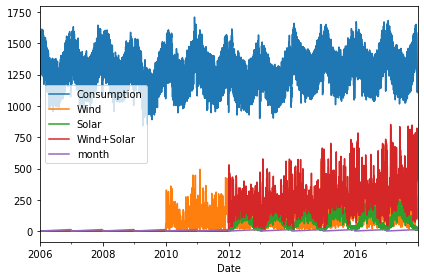

In [49]:
df.drop(columns='year').plot()
plt.tight_layout();

In [50]:
df.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'month', 'year'], dtype='object')

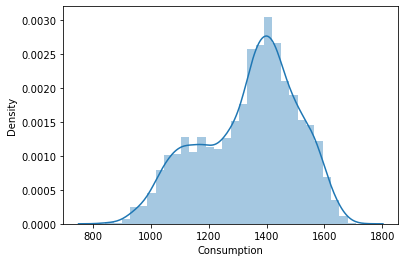

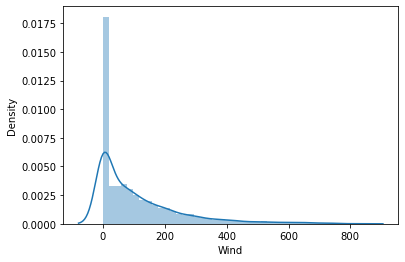

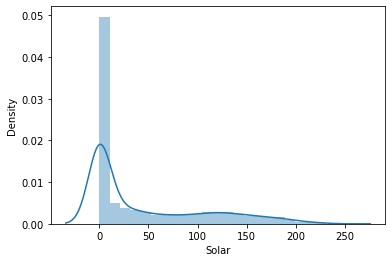

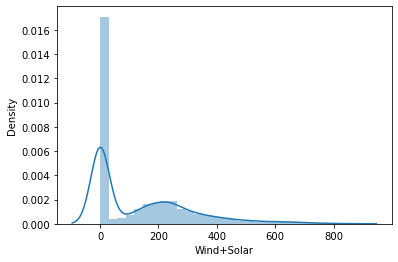

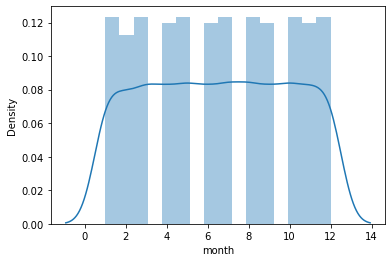

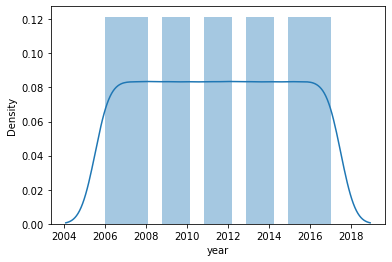

In [51]:
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

### 6.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [52]:
# let's put this all together into a function
def get_clean_power_data():
    '''
    Gets and cleans power data with imputation
    '''
    df = a.get_power() # call function from acquire to get data from .csv url
    df.Date = pd.to_datetime(df.Date) # make date column into datetime dtype
    df = df.set_index('Date') # set date column as index
    df['month'] = df.index.month_name() # add month name column
    df['year'] = df.index.year # add year column
    # Wind imputation
    df.Wind = np.where(df.year < 2010, 0, df.Wind) # fill missing values with 0s for dates before data was collected
    df['wind_previous_day'] = df.Wind.shift(1) # add a column for wind values from previous day to use for remaining imputation
    df.Wind[np.isnan(df.Wind)] = df.wind_previous_day # impute using value for previous day
    # Solar imputation
    df.Solar = np.where(df.year < 2012, 0, df.Solar) # fill missing values with 0s for dates before data was collected
    df['solar_previous_day'] = df.Solar.shift(1) # add a column for solar values from previous day to use for remaining imputation
    df.Solar[np.isnan(df.Solar)] = df.solar_previous_day # impute using value for previous day
    df['solar_previous_day'] = df.Solar.shift(1) # run again since missing values were grouped
    df.Solar[np.isnan(df.Solar)] = df.solar_previous_day # run again since missing values were grouped
    df['Wind+Solar'] = np.where(df.year < 2012, 0, df['Wind+Solar']) # set values to 0 for time before solar data was collected
    df['Wind+Solar'][np.isnan(df['Wind+Solar'])] = df.Wind + df.Solar # impute remaining missing values with sum
    df = df.drop(columns=['wind_previous_day', 'solar_previous_day']) # drop columns used for imputation that are no longer needed
    return df

In [53]:
# run using function in nb
df = get_clean_power_data()

In [54]:
# run using imported function
df = p.get_clean_power_data()